In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

First, we read our raw data.

In [3]:
data = pd.read_csv(r'BakuApartmentData.csv')
data

,Unnamed: 0,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
0,0,284000,Azadlıq Prospekti m.,3,140.0,12-May,1,1,1,1
1,1,355000,Şah İsmayıl Xətai m.,3,135.0,19/20,1,1,1,1
2,2,755000,Səbail r.,4,210.0,18-Jul,1,1,1,1
3,3,245000,Elmlər Akademiyası m.,3,86.0,10-Aug,1,1,1,1
4,4,350000,Elmlər Akademiyası m.,4,174.0,15-Dec,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
39297,39297,85500,9-cu mikrorayon q.,2,45.0,9-Sep,0,0,1,0
39298,39298,102500,Memar Əcəmi m.,2,48.0,5-Mar,0,0,1,0
39299,39299,143500,İnşaatçılar m.,3,65.0,5-Mar,0,0,1,0
39300,39300,172000,Elmlər Akademiyası m.,4,90.0,5-Mar,0,0,1,0


Now, we look at its describtion to start our preprocessing.

In [5]:
data.describe(include="all")

,Unnamed: 0,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
count,39302.000000,3.930200e+04,39302,39302.000000,39302.000000,39302,39302.000000,39302.000000,39302.000000,39302.000000
unique,NaN,NaN,111,NaN,NaN,370,NaN,NaN,NaN,NaN
top,NaN,NaN,İnşaatçılar m.,NaN,NaN,5-May,NaN,NaN,NaN,NaN
freq,NaN,NaN,2834,NaN,NaN,1143,NaN,NaN,NaN,NaN
mean,19650.500000,2.322323e+05,NaN,2.813648,106.039311,NaN,0.755890,0.839016,0.768256,0.337947
std,11345.654476,1.827754e+05,NaN,0.914880,59.856534,NaN,0.429564,0.367521,0.421952,0.473016
min,0.000000,9.600000e+03,NaN,1.000000,12.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,9825.250000,1.350000e+05,NaN,2.000000,65.000000,NaN,1.000000,1.000000,1.000000,0.000000
50%,19650.500000,1.870000e+05,NaN,3.000000,94.000000,NaN,1.000000,1.000000,1.000000,0.000000
75%,29475.750000,2.770000e+05,NaN,3.000000,130.000000,NaN,1.000000,1.000000,1.000000,1.000000


Here, we have useless column ["Unnamed: 0"]

In [7]:
data = data.drop(["Unnamed: 0"], axis=1)
data

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
0,284000,Azadlıq Prospekti m.,3,140.0,12-May,1,1,1,1
1,355000,Şah İsmayıl Xətai m.,3,135.0,19/20,1,1,1,1
2,755000,Səbail r.,4,210.0,18-Jul,1,1,1,1
3,245000,Elmlər Akademiyası m.,3,86.0,10-Aug,1,1,1,1
4,350000,Elmlər Akademiyası m.,4,174.0,15-Dec,1,1,1,1
...,...,...,...,...,...,...,...,...,...
39297,85500,9-cu mikrorayon q.,2,45.0,9-Sep,0,0,1,0
39298,102500,Memar Əcəmi m.,2,48.0,5-Mar,0,0,1,0
39299,143500,İnşaatçılar m.,3,65.0,5-Mar,0,0,1,0
39300,172000,Elmlər Akademiyası m.,4,90.0,5-Mar,0,0,1,0


We see that in our "floor" column, we have meaningless dates. So, we need to keep only days as "floor"

In [13]:
data['floor'] = pd.to_datetime(data['floor'], format='%d-%b', errors='coerce')
data['floor'] = data['floor'].dt.day

Let's check if we have NaN values in our dataset.

In [16]:
data.isnull().sum()

price                  0
location               0
rooms                  0
square                 0
floor               8439
new_building           0
has_repair             0
has_bill_of_sale       0
has_mortgage           0
dtype: int64

We can either delete those rows or just fill with mean.

In [19]:
data["floor"] = data["floor"].fillna(data["floor"].mean())

In [21]:
data.isnull().sum()

price               0
location            0
rooms               0
square              0
floor               0
new_building        0
has_repair          0
has_bill_of_sale    0
has_mortgage        0
dtype: int64

So we have no NaN values in our dataset.

We can observe that we have float values in our "floor" column

In [25]:
data["floor"] = data["floor"].astype(int)

In [27]:
data

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
0,284000,Azadlıq Prospekti m.,3,140.0,12,1,1,1,1
1,355000,Şah İsmayıl Xətai m.,3,135.0,12,1,1,1,1
2,755000,Səbail r.,4,210.0,18,1,1,1,1
3,245000,Elmlər Akademiyası m.,3,86.0,10,1,1,1,1
4,350000,Elmlər Akademiyası m.,4,174.0,15,1,1,1,1
...,...,...,...,...,...,...,...,...,...
39297,85500,9-cu mikrorayon q.,2,45.0,9,0,0,1,0
39298,102500,Memar Əcəmi m.,2,48.0,5,0,0,1,0
39299,143500,İnşaatçılar m.,3,65.0,5,0,0,1,0
39300,172000,Elmlər Akademiyası m.,4,90.0,5,0,0,1,0


In "location" columns, we see that some of them is finishing with "m." with means METRO.
Some of them finishing with "r." and "q." which means RAYON(REGION) and QƏSƏBƏ(SETTLEMENT).
So we create a new columns "has_metro" to determine whether there is a metro or not.

In [30]:
data['has_metro'] = np.where(data['location'].str[-2] == 'm', 1, 0)


In [32]:
data

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage,has_metro
0,284000,Azadlıq Prospekti m.,3,140.0,12,1,1,1,1,1
1,355000,Şah İsmayıl Xətai m.,3,135.0,12,1,1,1,1,1
2,755000,Səbail r.,4,210.0,18,1,1,1,1,0
3,245000,Elmlər Akademiyası m.,3,86.0,10,1,1,1,1,1
4,350000,Elmlər Akademiyası m.,4,174.0,15,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
39297,85500,9-cu mikrorayon q.,2,45.0,9,0,0,1,0,0
39298,102500,Memar Əcəmi m.,2,48.0,5,0,0,1,0,1
39299,143500,İnşaatçılar m.,3,65.0,5,0,0,1,0,1
39300,172000,Elmlər Akademiyası m.,4,90.0,5,0,0,1,0,1


Now, we will divide 111 unique locations into 13:
Binəqədi, Qaradağ, Xətai, Xəzər, Nərimanov, Nəsimi, Nizami, Səbail, Sabunçu, Suraxanı, Yasamal, Abşeron.

In [45]:
regions = pd.read_excel(r'regions.xlsx')

In [36]:
binagadi = regions["Binəqədi"].tolist()
qaradag = regions["Qaradağ"].tolist()[:4]
xetai = regions["Xətai"].tolist()[:11]
xezer = regions["Xəzər"].tolist()[:6]
narimanov = regions["Nərimanov"].tolist()[:6]
nasimi = regions["Nəsimi"].tolist()[:8]
nizami = regions["Nizami"].tolist()[:6]
sabail = regions["Səbail"].tolist()[:7]
sabuncu = regions["Sabunçu"].tolist()[:12]
suraxani = regions["Suraxanı"].tolist()[:14]
yasamal = regions["Yasamal"].tolist()[:6]
abseron = regions["Abşeron"].tolist()[:12]

In [41]:
for i,j in [
    (binagadi, "Binəqədi"),
    (qaradag, "Qaradağ"),
    (xetai, "Xətai"),
    (xezer, "Xəzər"),
    (narimanov, "Nərimanov"),
    (nasimi, "Nəsimi"),
    (nizami, "Nizami"),
    (sabail, "Səbail"),
    (sabuncu, "Sabunçu"),
    (suraxani, "Suraxanı"),
    (yasamal, "Yasamal"),
    (abseron, "Abşeron"),
]:
    data["location"] = data["location"].replace(i,j)

In [43]:
data

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage,has_metro
0,284000,Binəqədi,3,140.0,12,1,1,1,1,1
1,355000,Xətai,3,135.0,12,1,1,1,1,1
2,755000,Səbail,4,210.0,18,1,1,1,1,0
3,245000,Yasamal,3,86.0,10,1,1,1,1,1
4,350000,Yasamal,4,174.0,15,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
39297,85500,Binəqədi,2,45.0,9,0,0,1,0,0
39298,102500,Nəsimi,2,48.0,5,0,0,1,0,1
39299,143500,Yasamal,3,65.0,5,0,0,1,0,1
39300,172000,Yasamal,4,90.0,5,0,0,1,0,1


In [47]:
data_num = data.drop(["location"], axis=1)

It is time to measure CORRELATION between columns

In [50]:
data_num.corr()["price"]

price               1.000000
rooms               0.598693
square              0.808165
floor               0.214975
new_building        0.259140
has_repair         -0.117642
has_bill_of_sale    0.014385
has_mortgage       -0.004653
has_metro           0.067008
Name: price, dtype: float64

In [52]:
data = data.drop("has_bill_of_sale has_mortgage".split(), axis=1)

In [54]:
data_num = data_num.drop("has_bill_of_sale has_mortgage".split(), axis=1)

In [56]:
data_num.columns

Index(['price', 'rooms', 'square', 'floor', 'new_building', 'has_repair',
       'has_metro'],
      dtype='object')

Now, let's check the dependence between independent columns with VIF

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[[
    # 'rooms',
    'square',
    # 'floor',
    'new_building',
    'has_repair',
    'has_metro'
]]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.975757,square
1,3.909150,new_building
2,3.256982,has_repair
3,2.828574,has_metro


In [61]:
data = data.drop("rooms floor".split(), axis=1)
data_num = data_num.drop("rooms floor".split(), axis=1)

In [63]:
data

,price,location,square,new_building,has_repair,has_metro
0,284000,Binəqədi,140.0,1,1,1
1,355000,Xətai,135.0,1,1,1
2,755000,Səbail,210.0,1,1,0
3,245000,Yasamal,86.0,1,1,1
4,350000,Yasamal,174.0,1,1,1
...,...,...,...,...,...,...
39297,85500,Binəqədi,45.0,0,0,0
39298,102500,Nəsimi,48.0,0,0,1
39299,143500,Yasamal,65.0,0,0,1
39300,172000,Yasamal,90.0,0,0,1


Determining the outliers and capping them to the borders

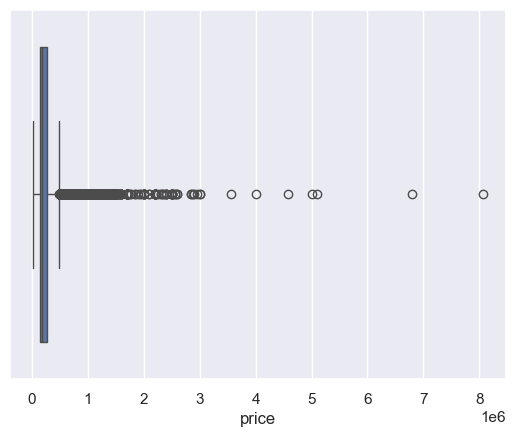

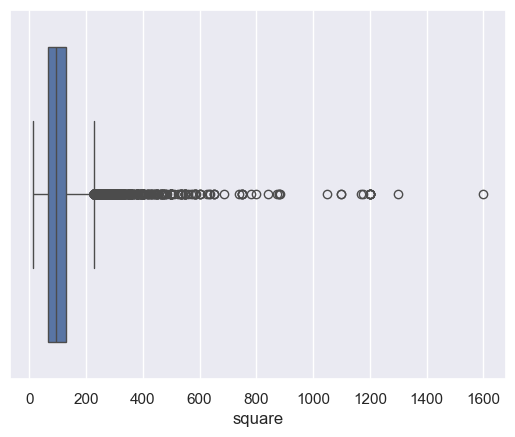

In [66]:
for i in ['price', 'square']:
    sns.boxplot(data=data, x=data[i])
    plt.show()

In [68]:
q1 = data_num.quantile(0.25)
q3 = data_num.quantile(0.75)
IQR = q3-q1
Upper = q3+1.5*IQR
Lower = q1-1.5*IQR

In [70]:
for i in ['price', 'square']:
    data[i] = np.where(data[i]>Upper[i], Upper[i], data[i])

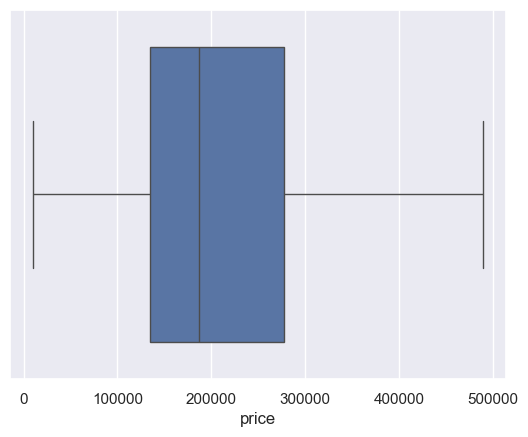

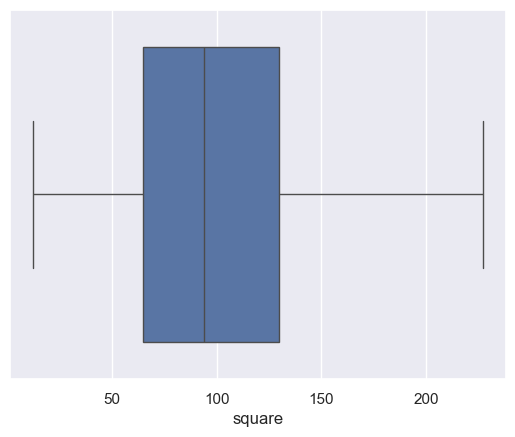

In [72]:
for i in ['price', 'square']:
    sns.boxplot(data=data, x=data[i])
    plt.show()

turning categorical values to 0/1s using get_dummies

In [75]:
data = pd.get_dummies(data, drop_first=True)

In [77]:
data[['location_Binəqədi', 'location_Nizami', 'location_Nərimanov',
       'location_Nəsimi', 'location_Pirallahı r.', 'location_Qaradağ',
       'location_Sabunçu', 'location_Suraxanı', 'location_Səbail',
       'location_Xətai', 'location_Xəzər', 'location_Yasamal']] = data[['location_Binəqədi', 'location_Nizami', 'location_Nərimanov',
       'location_Nəsimi', 'location_Pirallahı r.', 'location_Qaradağ',
       'location_Sabunçu', 'location_Suraxanı', 'location_Səbail',
       'location_Xətai', 'location_Xəzər', 'location_Yasamal']].astype(int)

In [79]:
data

,price,square,new_building,has_repair,has_metro,location_Binəqədi,location_Lökbatan q.,location_Nizami,location_Nərimanov,location_Nəsimi,location_Pirallahı r.,location_Qaradağ,location_Sabunçu,location_Suraxanı,location_Səbail,location_Xətai,location_Xəzər,location_Yasamal
0,284000.0,140.0,1,1,1,1,False,0,0,0,0,0,0,0,0,0,0,0
1,355000.0,135.0,1,1,1,0,False,0,0,0,0,0,0,0,0,1,0,0
2,490000.0,210.0,1,1,0,0,False,0,0,0,0,0,0,0,1,0,0,0
3,245000.0,86.0,1,1,1,0,False,0,0,0,0,0,0,0,0,0,0,1
4,350000.0,174.0,1,1,1,0,False,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39297,85500.0,45.0,0,0,0,1,False,0,0,0,0,0,0,0,0,0,0,0
39298,102500.0,48.0,0,0,1,0,False,0,0,1,0,0,0,0,0,0,0,0
39299,143500.0,65.0,0,0,1,0,False,0,0,0,0,0,0,0,0,0,0,1
39300,172000.0,90.0,0,0,1,0,False,0,0,0,0,0,0,0,0,0,0,1


Assigning dependent and independent values

In [82]:
y = data["price"]
x = data.drop(["price"], axis=1)

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=47)

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model, x_test, y_test):

    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

Applying ML Models:
1) LGBM
2) XGBoost
3) CatBoost

* tuning each model

In [89]:
from lightgbm import LGBMRegressor

In [90]:
lgbm_model = LGBMRegressor()
lgbm_model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 27511, number of used features: 15
[LightGBM] [Info] Start training from score 218722.494348


LGBMRegressor()

In [91]:
evaluate(lgbm_model, x_test, y_test)

{'MAE': 31367.193087139054,
 'MSE': 2111221007.110995,
 'RMSE': 45948.02506213945,
 'R-squared': 0.8287485104539344}

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
random_grid_lgbm = {
    "n_estimators": [10,50,100,500,1000],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3,5,7,10],
    "num_leaves": [10,20,30,40,60,70,80,90,100]
}

a = RandomizedSearchCV(
    estimator = lgbm_model,
    param_distributions = random_grid_lgbm,
    n_iter = 40, cv=3, verbose=1,
    random_state=47,n_jobs=-1
)

a.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 27511, number of used features: 15
[LightGBM] [Info] Start training from score 218722.494348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=40, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 60, 70,
                                                       80, 90, 100]},
                   random_state=47, verbose=1)

In [99]:
optimized_lgbm_model = a.best_estimator_
evaluate(optimized_lgbm_model, x_test, y_test)

{'MAE': 30034.445048510304,
 'MSE': 2028789959.702176,
 'RMSE': 45042.09097835242,
 'R-squared': 0.8354348969601579}

In [101]:
models = pd.DataFrame()
models["LGBM"] = ["82.89%"]
models["LGBM_opt"] = ["83.55%"]

In [103]:
from xgboost import XGBRegressor

In [105]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
evaluate(xgb_model, x_test, y_test)

{'MAE': 30859.165269061148,
 'MSE': 2098331502.9033625,
 'RMSE': 45807.54853627688,
 'R-squared': 0.8297940413517573}

In [109]:
random_grid_xgb = {
    "n_estimators": [10,50,100,500,1000],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3,5,7,10],
    "subsample": np.linspace(0.5, 1, num=6),
    "colsample_bytree": np.linspace(0.5, 1, num=6),
    "gamma": [0,1,5]
}

b = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = random_grid_xgb,
    n_iter = 40, cv=3, verbose=1,
    random_state=47,n_jobs=-1
)

b.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=47, verbose=1)

In [111]:
optimized_xgb_model = b.best_estimator_
evaluate(optimized_xgb_model, x_test, y_test)

{'MAE': 30495.28733051162,
 'MSE': 2067796526.9342818,
 'RMSE': 45473.03076477619,
 'R-squared': 0.8322708829994794}

In [113]:
models["XGB"] = ["82.95%"]
models["XGB_opt"] = ["83.27%"]

In [115]:
models

,LGBM,LGBM_opt,XGB,XGB_opt
0,82.89%,83.55%,82.95%,83.27%


In [117]:
from catboost import CatBoostRegressor

In [119]:
cb_model = CatBoostRegressor()
cb_model.fit(x_train, y_train)

Learning rate set to 0.069123
0:	learn: 104634.2143754	total: 154ms	remaining: 2m 33s
1:	learn: 99713.6538227	total: 158ms	remaining: 1m 18s
2:	learn: 95182.3441323	total: 161ms	remaining: 53.6s
3:	learn: 90963.6703226	total: 165ms	remaining: 41.1s
4:	learn: 87063.8401845	total: 169ms	remaining: 33.6s
5:	learn: 83560.4186202	total: 172ms	remaining: 28.5s
6:	learn: 80397.0982991	total: 175ms	remaining: 24.8s
7:	learn: 77544.7300935	total: 178ms	remaining: 22.1s
8:	learn: 74939.8367032	total: 181ms	remaining: 19.9s
9:	learn: 72536.6008137	total: 183ms	remaining: 18.2s
10:	learn: 70408.2096606	total: 186ms	remaining: 16.7s
11:	learn: 68470.3299806	total: 188ms	remaining: 15.5s
12:	learn: 66748.3554177	total: 191ms	remaining: 14.5s
13:	learn: 65131.6905764	total: 193ms	remaining: 13.6s
14:	learn: 63680.0997872	total: 195ms	remaining: 12.8s
15:	learn: 62314.3416565	total: 198ms	remaining: 12.2s
16:	learn: 61131.8631659	total: 201ms	remaining: 11.6s
17:	learn: 60078.6725259	total: 203ms	rema

In [121]:
evaluate(cb_model, x_test, y_test)

{'MAE': 30806.63076080156,
 'MSE': 2051024185.2537773,
 'RMSE': 45288.234512440176,
 'R-squared': 0.8336313698865876}

In [123]:
random_grid_cb = {
    "iterations": [10,50,100,500,1000],
    "learning_rate": [0.01, 0.1, 1],
    "depth": [3,5,7,10],
    "l2_leaf_reg": np.linspace(2,30,num=7)
}

c = RandomizedSearchCV(
    estimator = cb_model,
    param_distributions = random_grid_cb,
    n_iter = 40, cv=3, verbose=1,
    random_state=47,n_jobs=-1
)

c.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
0:	learn: 102260.6549460	total: 4.11ms	remaining: 2.05s
1:	learn: 95266.1692684	total: 13.4ms	remaining: 3.35s
2:	learn: 89074.7666932	total: 22.5ms	remaining: 3.72s
3:	learn: 83766.1827862	total: 25.2ms	remaining: 3.12s
4:	learn: 78809.6181485	total: 34.3ms	remaining: 3.39s
5:	learn: 74711.1687203	total: 43.6ms	remaining: 3.59s
6:	learn: 71069.9415305	total: 52.8ms	remaining: 3.72s
7:	learn: 67948.9415970	total: 62.2ms	remaining: 3.82s
8:	learn: 65093.4681116	total: 71.7ms	remaining: 3.91s
9:	learn: 62702.8060804	total: 77.7ms	remaining: 3.81s
10:	learn: 60666.9702985	total: 87.4ms	remaining: 3.88s
11:	learn: 58745.1631630	total: 97ms	remaining: 3.95s
12:	learn: 57158.3452075	total: 107ms	remaining: 4s
13:	learn: 55759.0162204	total: 116ms	remaining: 4.03s
14:	learn: 54753.5396608	total: 118ms	remaining: 3.83s
15:	learn: 53712.0919546	total: 128ms	remaining: 3.87s
16:	learn: 52889.8257103	total: 138ms	remaining: 3.91s
17:	l

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000002077CD4B170>,
                   n_iter=40, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 10],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1]},
                   random_state=47, verbose=1)

In [125]:
optimized_cb_model = c.best_estimator_
evaluate(optimized_cb_model, x_test, y_test)

{'MAE': 30500.35400532664,
 'MSE': 2041424980.0242505,
 'RMSE': 45182.131202769204,
 'R-squared': 0.8344100084983095}

In [127]:
models["CB"] = ["83.32%"]
models["CB_opt"] = ["83.41%"]

In [129]:
models

,LGBM,LGBM_opt,XGB,XGB_opt,CB,CB_opt
0,82.89%,83.55%,82.95%,83.27%,83.32%,83.41%


The best model is optimized LGBM which is with 83.55% accuracy